In [1]:
import pandas

from matplotlib import pyplot as plotter

In [2]:
sale_dataset_path = 'data/experience_sale_dataset'

KEY_experience = "YearsExperience"
KEY_sales = "HouseSales"

In [3]:
sale_dataset = pandas.read_csv(sale_dataset_path)

In [4]:
sale_dataset.head()

,YearsExperience,HouseSales
0,3.2,27
1,8.2,30
2,5.7,31
3,7.5,36
4,1.5,16


In [5]:
print(sale_dataset.shape)

(15, 2)


In [6]:
sale_dataset.describe()

,YearsExperience,HouseSales
count,15.000000,15.000000
mean,3.790000,22.666667
std,2.927346,9.802818
min,0.100000,6.000000
25%,1.250000,15.500000
50%,3.200000,22.000000
75%,6.225000,31.000000
max,8.500000,36.000000


(array([2., 2., 2., 0., 0., 2., 1., 1., 0., 0., 1., 1., 0., 1., 2.]),
 array([0.1 , 0.66, 1.22, 1.78, 2.34, 2.9 , 3.46, 4.02, 4.58, 5.14, 5.7 ,
        6.26, 6.82, 7.38, 7.94, 8.5 ]),
 <BarContainer object of 15 artists>)

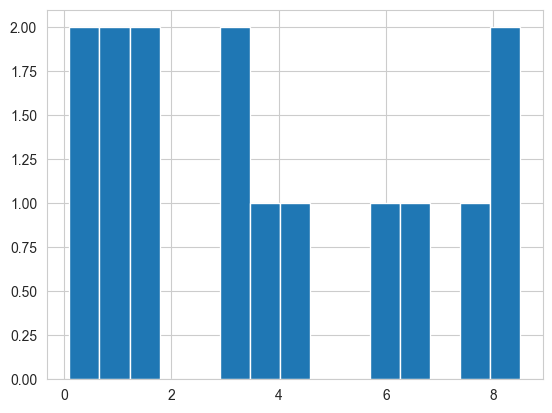

In [7]:
# Deneyim Dağılımına Bakalım
# Histogram
plotter.hist(sale_dataset[KEY_experience], bins=15)

(array([1., 1., 1., 2., 2., 1., 0., 1., 4., 2.]),
 array([ 6.,  9., 12., 15., 18., 21., 24., 27., 30., 33., 36.]),
 <BarContainer object of 10 artists>)

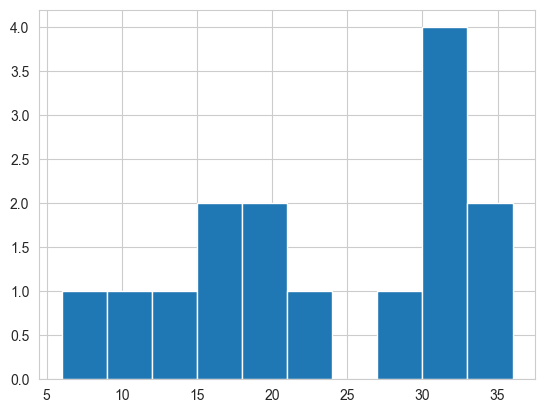

In [8]:
# Satış Dağılımına Bakalım

plotter.hist(sale_dataset[KEY_sales], bins=10)

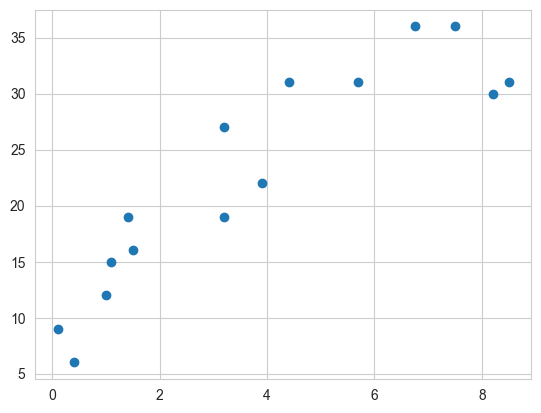

In [9]:
# Veriyi Görelim
# Scatter

plotter.scatter(x = sale_dataset[KEY_experience], y = sale_dataset[KEY_sales])

In [10]:
# Önce Bir Lineer Regresyon Deneyelim ^_^

from sklearn.linear_model import LinearRegression

reg_model = LinearRegression().fit(sale_dataset[[KEY_experience]],
                                   sale_dataset[[KEY_sales]])

In [11]:
reg_model.score(sale_dataset[[KEY_experience]], sale_dataset[[KEY_sales]])

0.8137110174932514

In [12]:
reg_model.coef_

array([[3.02073001]])

In [13]:
reg_model.intercept_

array([11.21809993])

In [14]:
predictions = reg_model.predict(sale_dataset[[KEY_experience]])

In [15]:
predictions

array([[20.88443596],
       [35.98808601],
       [28.43626099],
       [33.873575  ],
       [15.74919494],
       [14.54090294],
       [31.6080275 ],
       [36.89430501],
       [20.88443596],
       [22.99894697],
       [11.52017293],
       [14.23882994],
       [12.42639193],
       [24.50931197],
       [15.44712194]])

In [16]:
residuler = []
for x in range(len(predictions)):
    residuler.append(sale_dataset[KEY_sales][x] - predictions[x])

In [17]:
from sklearn.metrics import r2_score

r2_score_linear = r2_score(sale_dataset[KEY_sales], predictions)

In [18]:
r2_score_linear

0.8137110174932514

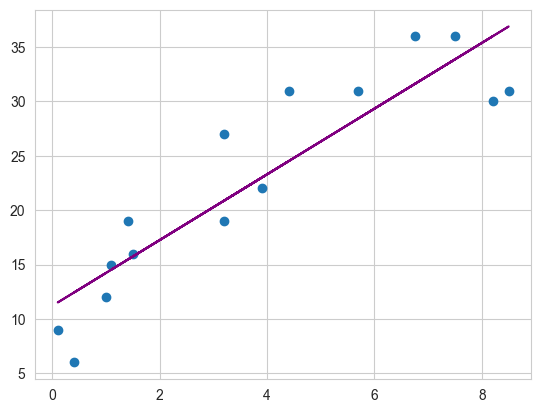

In [19]:
plotter.scatter(x = sale_dataset[KEY_experience], 
                y = sale_dataset[KEY_sales])
plotter.plot(sale_dataset[KEY_experience], predictions, color='purple')

In [20]:
residuler

[array([6.11556404]),
 array([-5.98808601]),
 array([2.56373901]),
 array([2.126425]),
 array([0.25080506]),
 array([0.45909706]),
 array([4.3919725]),
 array([-5.89430501]),
 array([-1.88443596]),
 array([-0.99894697]),
 array([-2.52017293]),
 array([-2.23882994]),
 array([-6.42639193]),
 array([6.49068803]),
 array([3.55287806])]

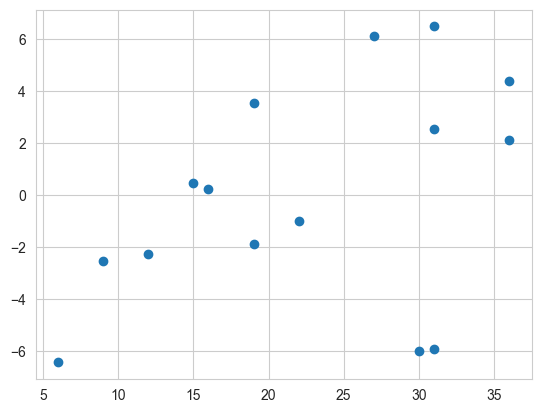

In [21]:
# Residüleri Görelim
# Scatter

plotter.scatter(x = sale_dataset[KEY_sales], 
                y = residuler)

In [22]:
from sklearn.preprocessing import PolynomialFeatures

poly_model = PolynomialFeatures(2)
transformed_data = poly_model.fit_transform(sale_dataset[[KEY_experience]],
                                            sale_dataset[[KEY_sales]])

In [23]:
transformed_data

array([[1.00000e+00, 3.20000e+00, 1.02400e+01],
       [1.00000e+00, 8.20000e+00, 6.72400e+01],
       [1.00000e+00, 5.70000e+00, 3.24900e+01],
       [1.00000e+00, 7.50000e+00, 5.62500e+01],
       [1.00000e+00, 1.50000e+00, 2.25000e+00],
       [1.00000e+00, 1.10000e+00, 1.21000e+00],
       [1.00000e+00, 6.75000e+00, 4.55625e+01],
       [1.00000e+00, 8.50000e+00, 7.22500e+01],
       [1.00000e+00, 3.20000e+00, 1.02400e+01],
       [1.00000e+00, 3.90000e+00, 1.52100e+01],
       [1.00000e+00, 1.00000e-01, 1.00000e-02],
       [1.00000e+00, 1.00000e+00, 1.00000e+00],
       [1.00000e+00, 4.00000e-01, 1.60000e-01],
       [1.00000e+00, 4.40000e+00, 1.93600e+01],
       [1.00000e+00, 1.40000e+00, 1.96000e+00]])

In [24]:
from sklearn.linear_model import LinearRegression

quadratic_model = LinearRegression().fit(transformed_data, sale_dataset[[KEY_sales]])

In [25]:
quadratic_model.intercept_

array([6.45196075])

In [26]:
quadratic_model.coef_

array([[ 0.        ,  7.06439652, -0.4721974 ]])

In [27]:
predictions_quadratic = quadratic_model.predict(transformed_data)

In [28]:
sale_dataset[KEY_experience]

0     3.20
1     8.20
2     5.70
3     7.50
4     1.50
5     1.10
6     6.75
7     8.50
8     3.20
9     3.90
10    0.10
11    1.00
12    0.40
13    4.40
14    1.40
Name: YearsExperience, dtype: float64

In [29]:
predictions_quadratic

array([[24.22272827],
       [32.62945923],
       [31.37732748],
       [32.87383106],
       [15.98611139],
       [13.65143807],
       [32.62214335],
       [32.38306922],
       [24.22272827],
       [26.82098477],
       [ 7.15367843],
       [13.04415987],
       [ 9.20216778],
       [28.39356383],
       [15.41660898]])

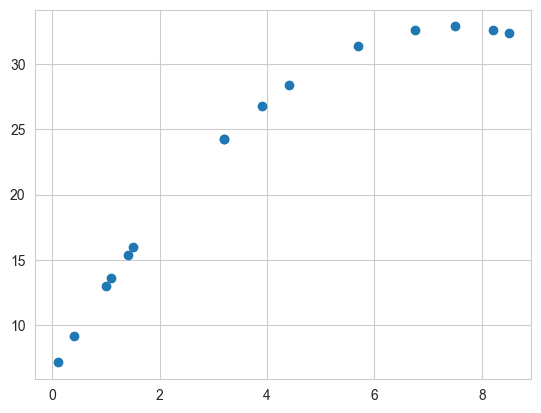

In [30]:
plotter.scatter(x = sale_dataset[KEY_experience], 
                y = predictions_quadratic)

In [31]:
r2_score_quadratic = r2_score(sale_dataset[KEY_sales], 
                              predictions_quadratic)

In [32]:
r2_score_quadratic

0.9073907971182075

In [33]:
sale_dataset[KEY_experience].shape

(15,)

In [34]:
temp = []
for x in range(len(sale_dataset[KEY_experience])):
    temp.append([sale_dataset[KEY_experience][x],predictions_quadratic[x]])
temp.sort(key=lambda x: x[0])

x = []
y_pred = []

for a in temp:
    x.append(a[0])
    y_pred.append(a[1])

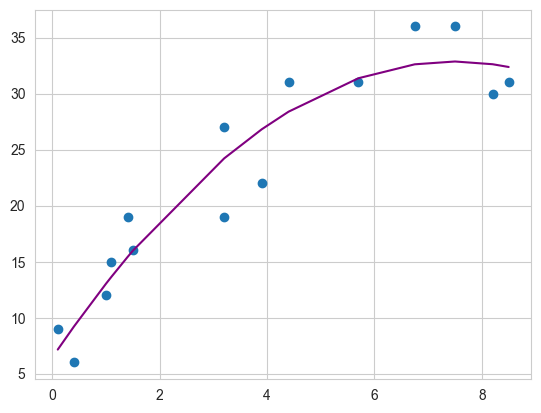

In [35]:
plotter.scatter(x = sale_dataset[KEY_experience], 
                y = sale_dataset[KEY_sales])

plotter.plot(x, 
             y_pred, 
             color='purple')

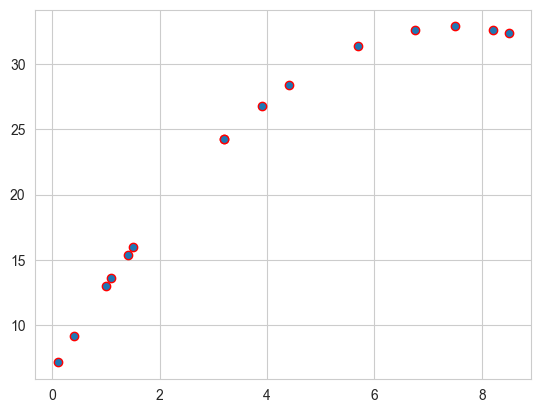

In [36]:
plotter.scatter(x = sale_dataset[KEY_experience], 
                y = predictions_quadratic,
                edgecolors='red')

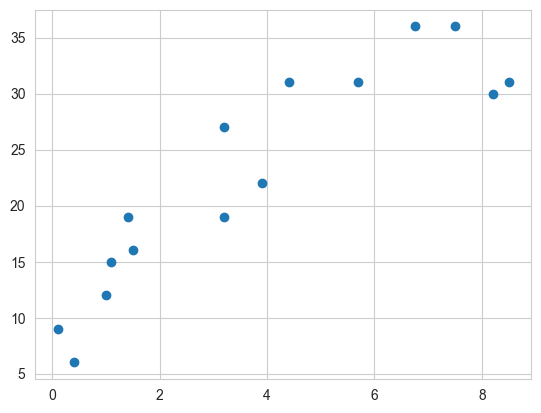

In [37]:
plotter.scatter(x=sale_dataset[KEY_experience],
                y=sale_dataset[KEY_sales])

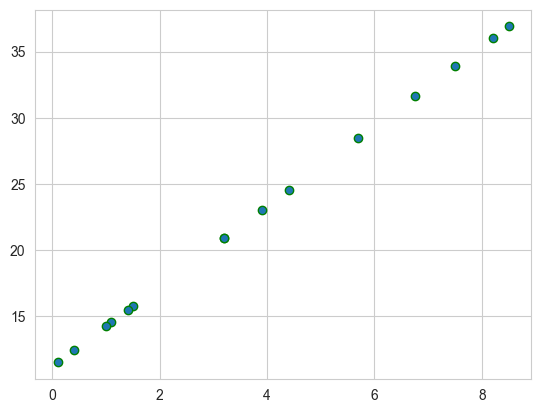

In [38]:
plotter.scatter(x=sale_dataset[KEY_experience],
                y=predictions, edgecolors='green')

In [39]:
residuler_quadratic = []
for x in range(len(predictions_quadratic)):
    residuler_quadratic.append(sale_dataset[KEY_sales][x] - predictions_quadratic[x])

In [40]:
residuler_quadratic

[array([2.77727173]),
 array([-2.62945923]),
 array([-0.37732748]),
 array([3.12616894]),
 array([0.01388861]),
 array([1.34856193]),
 array([3.37785665]),
 array([-1.38306922]),
 array([-5.22272827]),
 array([-4.82098477]),
 array([1.84632157]),
 array([-1.04415987]),
 array([-3.20216778]),
 array([2.60643617]),
 array([3.58339102])]

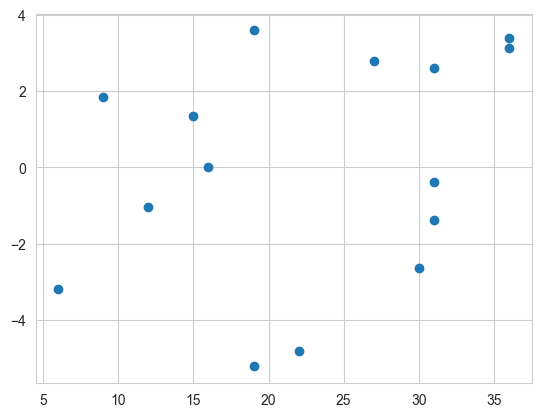

In [41]:
plotter.scatter(x = sale_dataset[KEY_sales], 
                y = residuler_quadratic)

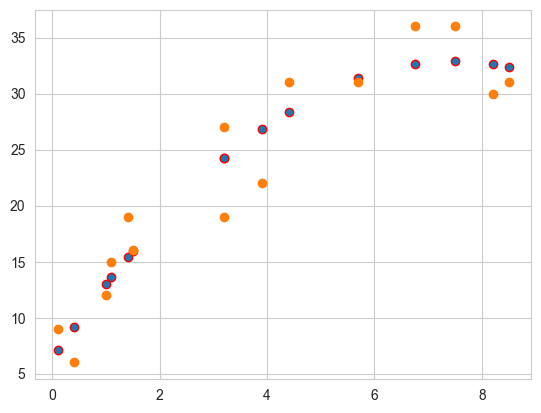

In [42]:
plotter.scatter(x = sale_dataset[KEY_experience], 
                y = predictions_quadratic,
                edgecolors='red')
plotter.scatter(x=sale_dataset[KEY_experience],
                y=sale_dataset[KEY_sales])

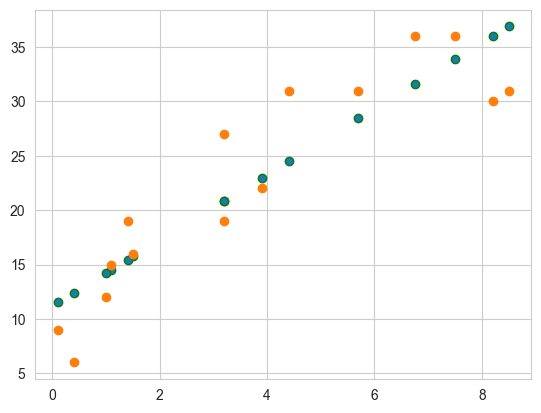

In [43]:
plotter.scatter(x=sale_dataset[KEY_experience],
                y=predictions, 
                edgecolors='green')
plotter.scatter(x=sale_dataset[KEY_experience],
                y=sale_dataset[KEY_sales])


Further -> https://scikit-learn.org/stable/supervised_learning.html#supervised-learning